In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

palette = [
    255, 0, 0,
    255, 165, 0,
    255, 255, 0,
    0, 255, 255,
    #0, 0, 255,
    200, 128, 128,
    0, 255, 0,
    128, 0, 255,
    128, 128, 128,
    128, 128, 0,
    0, 128, 255,
    0, 0, 128,
]
#out_path = "sample.png"
#img1.save(out_path) #保存

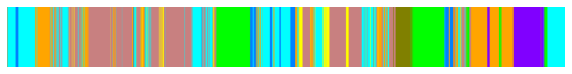

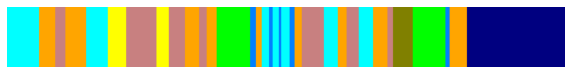

In [6]:
#time_range = [500, 3300]
x = 1500
time_range = [x, x + 2800]

video_name = "r17"

df = pd.read_csv(f"visualize_output/vgg_tcn/pred_labels_{video_name}.csv", index_col = 0)
def make_labelband(labels, h = 300, palette = None, time_range = [0, 1000]):
    labels = np.array(labels).astype(np.uint8)
    labels = labels[time_range[0]:time_range[1]]
    labels = np.tile(labels, (300, 1))
    img = Image.fromarray(labels)
    img = img.convert("P")
    img.putpalette(palette)
    return img
pred_img = make_labelband(df.pred.values, palette = palette, time_range=time_range)
gt_img = make_labelband(df.labels.values, palette = palette, time_range=time_range)
fig = plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(pred_img)
#plt.savefig("visualize_output/r17_tcn_pred.png")
plt.show()
fig = plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(gt_img)
#plt.savefig("visualize_output/r17_gt.png")
plt.show()

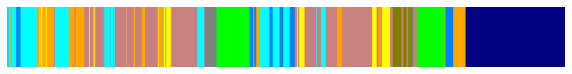

In [41]:
df = pd.read_csv(f"visualize_output/vgg_lstm/pred_labels_{video_name}.csv", index_col = 0)

pred_img = make_labelband(df.pred.values, palette = palette, time_range=time_range)
fig = plt.figure(figsize = (10,10))

plt.axis("off")
plt.imshow(pred_img)
#plt.savefig("visualize_output/r17_lstm_pred.png")
plt.show()

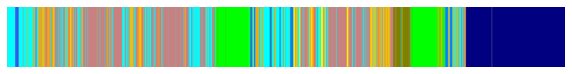

In [42]:
df = pd.read_csv(f"visualize_output/vgg_NN/pred_labels_{video_name}.csv", index_col = 0)

pred_img = make_labelband(df.pred.values, palette = palette, time_range=time_range)
fig = plt.figure(figsize = (10,10))

plt.axis("off")
plt.imshow(pred_img)
#plt.savefig("visualize_output/r17_NN_pred.png")
plt.show()

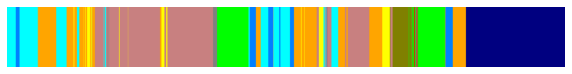

In [43]:
df = pd.read_csv(f"visualize_output/vgg_lstm_time/pred_labels_{video_name}.csv", index_col = 0)

pred_img = make_labelband(df.pred.values, palette = palette, time_range=time_range)
fig = plt.figure(figsize = (10,10))

plt.axis("off")
plt.imshow(pred_img)
#plt.savefig("visualize_output/r17_lstm__time_pred.png")
plt.show()

In [33]:
df.pred.values[2200:2300]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1,
       9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
import utils
utils.return_labels()

['opening',
 'moving',
 'hidden',
 'painting',
 'battle',
 'respawn',
 'superjump',
 'object',
 'special',
 'map',
 'ending']

In [9]:
gt = df.labels

In [14]:
output = {}
for i in range(11):
    output[i] = []

for v in ["r1", "r2", "r17", "r10", "r21"]:
    attention = np.load(f"visualize_output/{v}_attention.npy")
    df = pd.read_csv(f"visualize_output/vgg_lstm_time/pred_labels_{v}.csv", index_col = 0)
    gt = df.labels
    for i in np.unique(gt):
        index = gt == i
        _gt = gt[index]
        _att = attention[0, index, i]
        print(v, i, _gt.shape, _att[_att > 0.5].shape[0], np.mean(_att))
        output[i].append(np.mean(_att))

r1 0 (245,) 93 0.49863157
r1 1 (423,) 0 0.010412068
r1 3 (587,) 6 0.04175613
r1 4 (471,) 0 0.0071758255
r1 5 (172,) 0 0.07587681
r1 6 (94,) 1 0.073777795
r1 7 (122,) 0 0.0065455833
r1 10 (664,) 105 0.28014472
r2 0 (246,) 144 0.51995116
r2 1 (1520,) 1 0.030746646
r2 2 (94,) 0 0.011253599
r2 3 (1142,) 0 0.019264663
r2 4 (1195,) 0 0.013909703
r2 5 (651,) 10 0.11756306
r2 7 (354,) 2 0.026312202
r2 8 (89,) 0 0.06669251
r2 9 (50,) 0 0.13114157
r2 10 (666,) 142 0.31938097
r17 0 (201,) 40 0.2960696
r17 1 (685,) 7 0.044192404
r17 2 (154,) 0 0.06495031
r17 3 (1416,) 13 0.03905473
r17 4 (552,) 3 0.059948087
r17 5 (500,) 30 0.16984491
r17 8 (179,) 9 0.15316935
r17 9 (121,) 5 0.23656234
r17 10 (502,) 126 0.35178864
r10 0 (247,) 112 0.49030122
r10 1 (1686,) 2 0.026316687
r10 2 (378,) 0 0.023579095
r10 3 (432,) 0 0.021426829
r10 4 (1353,) 0 0.010913473
r10 5 (1193,) 16 0.13404576
r10 7 (857,) 0 0.024762163
r10 8 (96,) 0 0.072102524
r10 9 (8,) 0 0.24469396
r10 10 (482,) 142 0.24587859
r21 0 (170,) 109

In [18]:
for i in range(11):
    print(i, 1 - np.mean(output[i]))

0 0.5283943712711334
1 0.9720353372395039
2 0.9684546589851379
3 0.9686074666678905
4 0.9774231854826212
5 0.8843880519270897
6 0.9262222051620483
7 0.9789834022521973
8 0.9026785418391228
9 0.7656126320362091
10 0.7021636962890625


In [9]:
r17 1 (685,) 7 0.044192404
r17 2 (154,) 0 0.06495031
r17 3 (1416,) 13 0.03905473
r17 4 (552,) 3 0.059948087
r17 5 (500,) 30 0.16984491
r17 8 (179,) 9 0.15316935
r17 9 (121,) 5 0.23656234

(4310,)


(1, 4310, 11)


array([ 0,  0,  0, ..., 10, 10, 10])

(1, 4310, 4310)

In [27]:
for i in np.unique(gt):
    index = gt == i
    _gt = gt[index]
    _att = attention[0, index, i]
    print(i, _gt.shape, _att[_att > 0.5].shape[0], np.mean(_att))

0 (201,) 40 0.2960696
1 (685,) 7 0.044192404
2 (154,) 0 0.06495031
3 (1416,) 13 0.03905473
4 (552,) 3 0.059948087
5 (500,) 30 0.16984491
8 (179,) 9 0.15316935
9 (121,) 5 0.23656234
10 (502,) 126 0.35178864
